# Exercício prático

In [85]:
# Importação das biliotecas

import pandas as pd
import seaborn as srn
import matplotlib.pyplot as plt
import statistics as sts

# Leitura do banco de dados
pasta = 'Dados/'
dataset = pd.read_csv(pasta+'tempo.csv', sep=';')

dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


## Análise exploratória

Identificar os possíveis problemas em cada coluna

In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Aparencia    14 non-null     object 
 1   Temperatura  14 non-null     int64  
 2   Umidade      13 non-null     float64
 3   Vento        13 non-null     object 
 4   Jogar        14 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 688.0+ bytes


Informações retiradas até o momento:
1. As colunas "Temperatura" e "Umidade" são identificadas como colunas numéricas e as demais como colunas qualitativas.
1. As colunas "Umidade" e "Vento" apresentam 1 valor nulo cada

In [59]:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [77]:
'''
for item in ['Aparencia', 'Vento', 'Jogar']:
    print(item)
    for key, item in dataset.groupby([item]).size().items():
        print(key, item, sep='\t')
    print(20*'-')
'''
for item in ['Aparencia', 'Vento', 'Jogar']:
    print(dataset.groupby([item]).size())
    print(20*'-')

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64
--------------------
Vento
FALSO         7
VERDADEIRO    6
dtype: int64
--------------------
Jogar
nao    5
sim    9
dtype: int64
--------------------


Problemas identificados:
1. Na coluna "Aparencia" existe 1(um) valor fora do domínio permitido

O resto das informações estão coerentes e sem problema

In [4]:
for item in ['Temperatura', 'Umidade']:
    print(dataset[item].describe(), end='\n\n')

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64



Um ponto importante a se destacar é que na tabela "temperatura", a média(155.6) e a mediana(73) estão muito distantes, sendo indício de um possível problema na distribuição de dados. O que pode estar sendo causado pelo valor máximo de 1220, sendo que o domínio da temperatura deve estar entre -130°f ~ 130°F

O valor máximo da "Umidade" também está fora do domínio, que deve variar de 0 ~ 100

Text(0.5, 1.0, 'Temperatura')

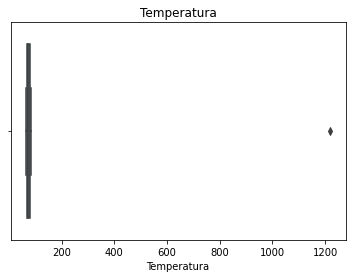

In [57]:
srn.boxplot(x=dataset['Temperatura']).set_title('Temperatura')

Text(0.5, 1.0, 'Umidade')

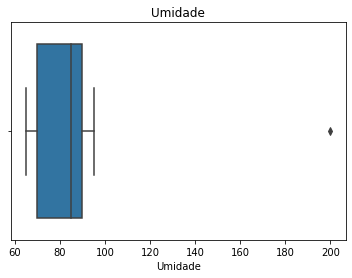

In [58]:
srn.boxplot(x=dataset['Umidade']).set_title('Umidade')

Ambas as colunas apresental apenas 1(um) outlier

## Tratamento dos dados

Empty DataFrame
Columns: [Aparencia, Temperatura, Umidade, Vento, Jogar]
Index: []


Text(0.5, 1.0, 'Umidade')

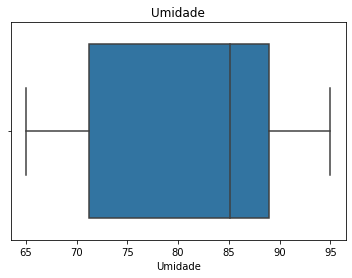

In [89]:
mediana = sts.median(dataset['Umidade'])
dataset['Umidade'].fillna(mediana, inplace=True)
dataset.loc[dataset['Umidade'] > 100, 'Umidade'] = mediana

print(dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)].head())
srn.boxplot(x=dataset['Umidade']).set_title('Umidade')


count    14.000000
mean     73.678571
std       6.556286
min      64.000000
25%      69.250000
50%      72.750000
75%      78.750000
max      85.000000
Name: Temperatura, dtype: float64
--------------------


Text(0.5, 1.0, 'Temperatura')

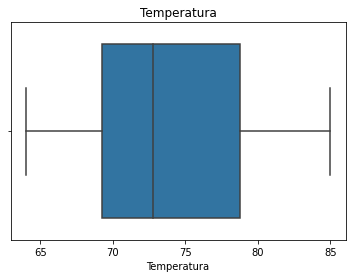

In [91]:
mediana = sts.median(dataset['Temperatura'])
dataset.loc[dataset['Temperatura']>130, 'Temperatura'] = mediana

print(dataset['Temperatura'].describe())
print(20*'-')
srn.boxplot(x=dataset['Temperatura']).set_title('Temperatura')

In [92]:
dataset['Vento'].fillna('FALSO', inplace=True)

print(dataset.isnull().sum())
print(20*'-')

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64
--------------------


In [93]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Aparencia    14 non-null     object 
 1   Temperatura  14 non-null     float64
 2   Umidade      14 non-null     float64
 3   Vento        14 non-null     object 
 4   Jogar        14 non-null     object 
dtypes: float64(2), object(3)
memory usage: 688.0+ bytes
